## TUGAS UAS SAINS DATA

### NAMA : DWI AHMAD DZULHIJJAH 
### EMAIL : 1818101@scholar.itn.ac.id
### Kampus asal : ITN Malang
### Kampus ICEI : Universitas Diponegoro
### Matkul : Sains Data (Data Science)

________________________________________

### BUSINESS UNDESTANDING

#### MEMPERSIAPKAN LIBRARY

In [16]:
# data analysis and wrangling
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
# visualization
import seaborn as sns
import matplotlib. pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import f_regression, mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance

####  DATA (DATA WRANGLING)

##### MEMBACA DATA

In [4]:
Data = pd.read_csv("Placement_Data_Full_Class.csv")

In [99]:
Data.head(5)

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,91.00,58.00,0,55.0,1,58.80,1
1,2,1,79.33,78.33,77.48,1,86.5,0,66.28,1
2,3,1,65.00,68.00,64.00,0,75.0,0,57.80,1
3,4,1,56.00,52.00,52.00,0,66.0,1,59.43,0
4,5,1,85.80,73.60,73.30,0,96.8,0,55.50,1


In [20]:
Data.shape

(215, 15)

##### Telaah TIPE DATA

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


##### TELAAH JENIS DATA

In [10]:
s = (Data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [11]:
x = (Data.dtypes == ('int64'))
integer_cols = list(x[x].index)
print("integer variables:")
print(integer_cols)

integer variables:
['sl_no']


In [12]:
x = (Data.dtypes == ('float64'))
float_cols = list(x[x].index)
print("float variables:")
print(float_cols)

float variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [13]:
print("numerical variables:")
numerical_cols=float_cols+integer_cols
print(numerical_cols)

numerical variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'sl_no']


In [24]:
Data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [18]:
Data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [15]:
Data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [26]:
# getting the object columns
object_columns = Data.select_dtypes(include=['object']).columns

# iterating over each object type column
for col in object_columns:
    print('-' * 40 + col + '-' * 40 , end='-')
    display(Data[col].value_counts())

----------------------------------------gender-----------------------------------------

M    139
F     76
Name: gender, dtype: int64

----------------------------------------ssc_b-----------------------------------------

Central    116
Others      99
Name: ssc_b, dtype: int64

----------------------------------------hsc_b-----------------------------------------

Others     131
Central     84
Name: hsc_b, dtype: int64

----------------------------------------hsc_s-----------------------------------------

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

----------------------------------------degree_t-----------------------------------------

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

----------------------------------------workex-----------------------------------------

No     141
Yes     74
Name: workex, dtype: int64

----------------------------------------specialisation-----------------------------------------

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

----------------------------------------status-----------------------------------------

Placed        148
Not Placed     67
Name: status, dtype: int64

#### Data Preprocessing

##### Mengatasi Data Null

In [36]:
Data['salary'].fillna((Data['salary'].mean()), inplace=True)

In [37]:
Data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

##### Label Encoding

In [41]:
label = LabelEncoder()
Data["gender"] = label.fit_transform(Data["gender"])
Data["ssc_b"] = label.fit_transform(Data["ssc_b"])
Data["hsc_b"] = label.fit_transform(Data["hsc_b"])
Data["hsc_s"] = label.fit_transform(Data["hsc_s"])
Data["degree_t"] = label.fit_transform(Data["degree_t"])
Data["workex"] = label.fit_transform(Data["workex"])
Data["specialisation"] = label.fit_transform(Data["specialisation"])
Data["status"] = label.fit_transform(Data["status"])

In [42]:
Data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1,425000.000000
5,6,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0,288655.405405
6,7,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0,288655.405405
7,8,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1,252000.000000
8,9,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29,1,231000.000000
9,10,1,58.00,0,70.00,0,1,61.00,0,0,54.00,0,52.21,0,288655.405405


#### Eksplorasi Data (EDA)

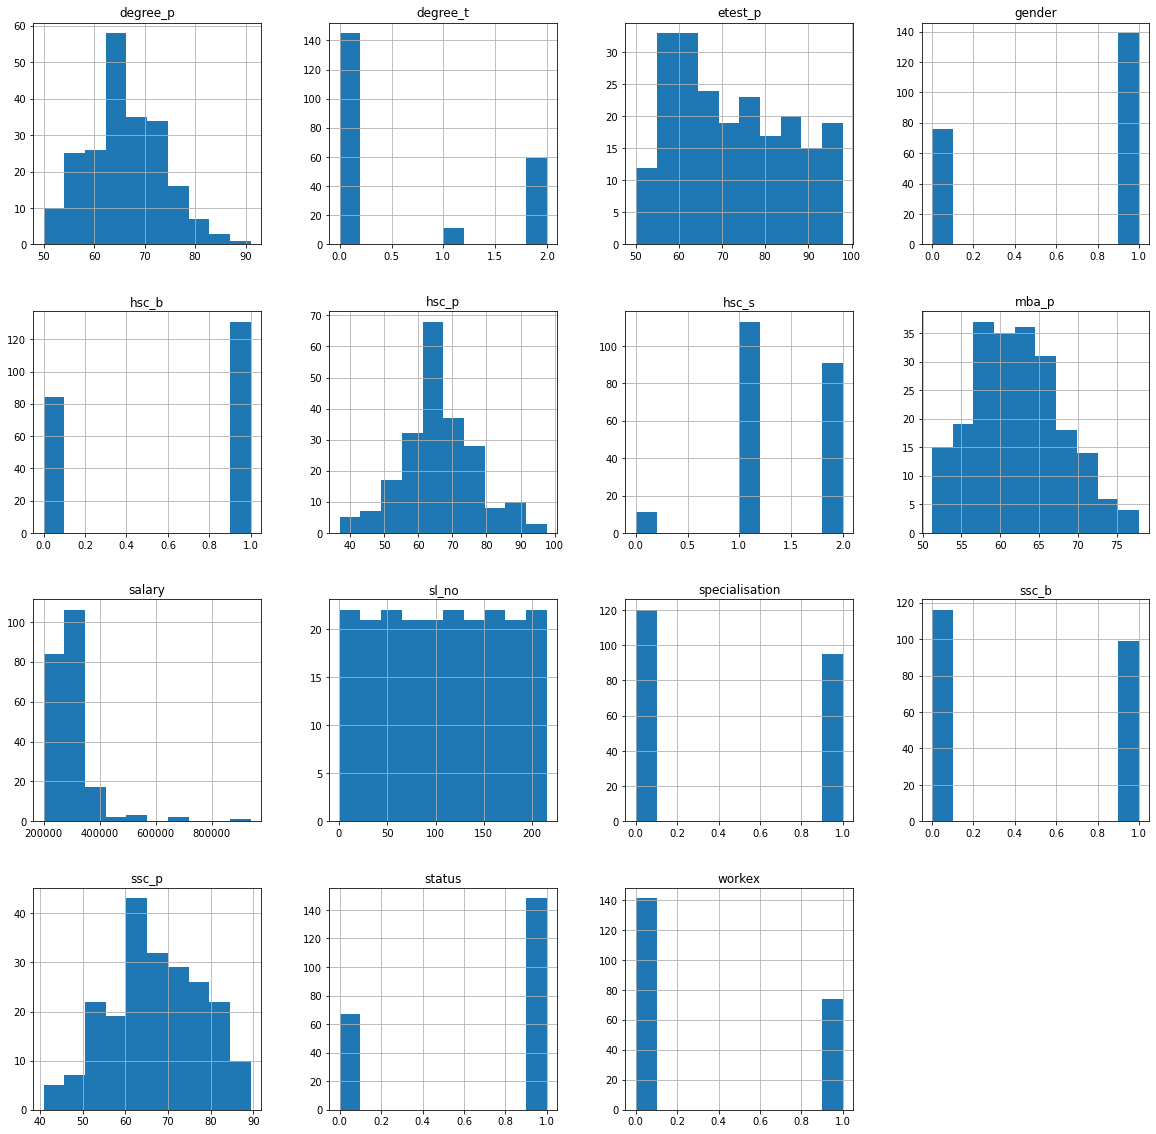

In [43]:
Data.hist(figsize = (20, 20))
plt.show()

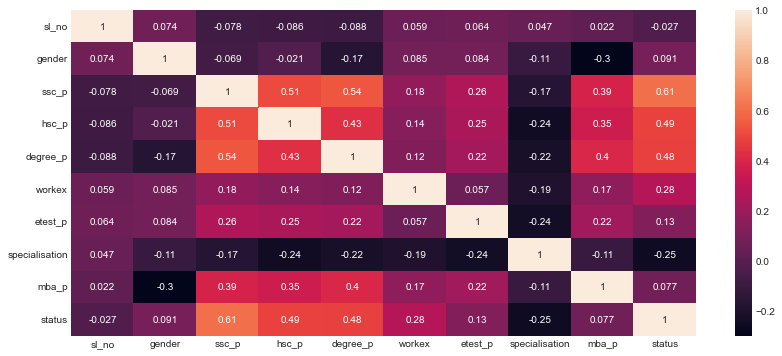

In [96]:
cor=Data.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

#### Analisis Pengalaman Kerja dan Status Penempatan

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


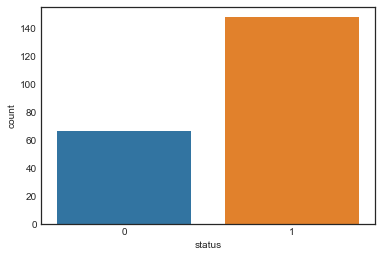

In [47]:
sns.countplot('status', data=Data)

In [49]:
Data['gender'].value_counts()

1    139
0     76
Name: gender, dtype: int64

In [52]:
df = pd.DataFrame(Data.groupby(['gender','status'])['status'].count()) 
df

status
gender status        
0      0           28
       1           48
1      0           39
       1          100

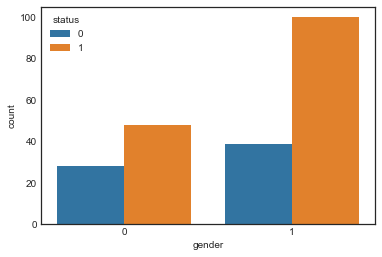

In [54]:
sns.countplot(x='gender', hue='status', data=Data)

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'SSC %')

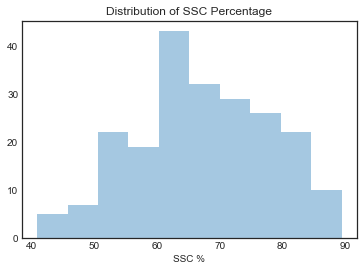

In [56]:
sns.distplot(Data['ssc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')

Text(9.549999999999997, 0.5, 'SSC %')

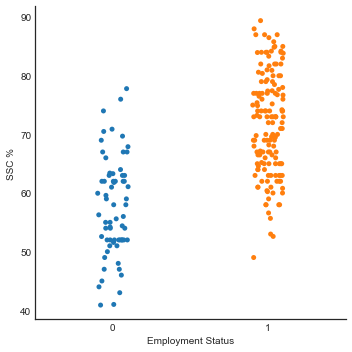

In [58]:
sns.catplot(y='ssc_p', x='status', data=Data)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

In [59]:
Data['ssc_b'].value_counts()

0    116
1     99
Name: ssc_b, dtype: int64

In [60]:
df = pd.DataFrame(Data.groupby(['ssc_b','status'])['status'].count())
df

status
ssc_b status        
0     0           38
      1           78
1     0           29
      1           70

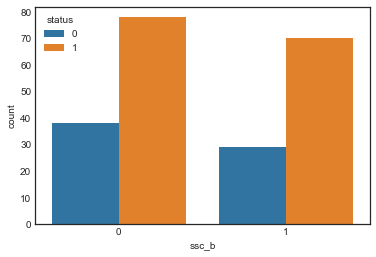

In [62]:
sns.countplot(x='ssc_b', hue='status', data=Data)

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'HSC %')

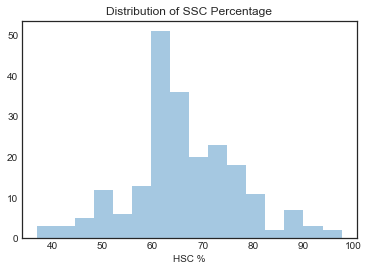

In [63]:
sns.distplot(Data['hsc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('HSC %')

Text(3.924999999999997, 0.5, 'HSC %')

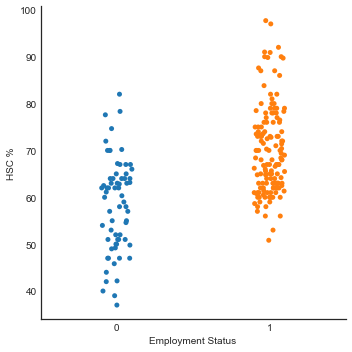

In [65]:
sns.catplot(y='hsc_p', x='status', data=Data)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

In [66]:
Data['hsc_b'].value_counts()

1    131
0     84
Name: hsc_b, dtype: int64

In [67]:
df = pd.DataFrame(Data.groupby(['hsc_b','status'])['status'].count())
df

status
hsc_b status        
0     0           27
      1           57
1     0           40
      1           91

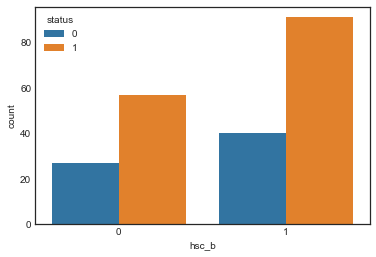

In [68]:
sns.countplot(x='hsc_b', hue='status', data=Data)

In [69]:
Data['hsc_s'].value_counts()

1    113
2     91
0     11
Name: hsc_s, dtype: int64

In [70]:
df = pd.DataFrame(Data.groupby(['hsc_s','status'])['status'].count())
df

status
hsc_s status        
0     0            5
      1            6
1     0           34
      1           79
2     0           28
      1           63

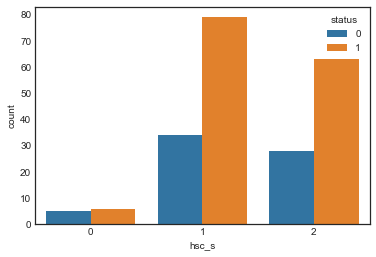

In [71]:
sns.countplot(x='hsc_s', hue='status', data=Data)

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Degree %')

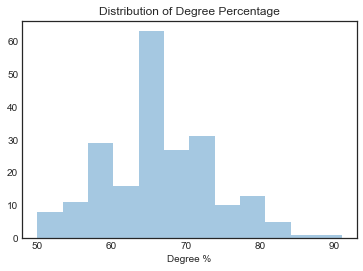

In [72]:
sns.distplot(Data['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

Text(9.549999999999997, 0.5, 'Degree %')

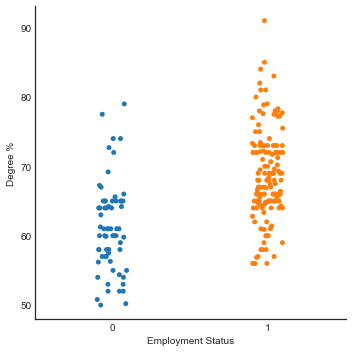

In [73]:
sns.catplot(y='degree_p', x='status', data=Data)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

In [74]:
Data['degree_t'].value_counts()

0    145
2     59
1     11
Name: degree_t, dtype: int64

In [75]:
df = pd.DataFrame(Data.groupby(['degree_t','status'])['status'].count())
df

status
degree_t status        
0        0           43
         1          102
1        0            6
         1            5
2        0           18
         1           41

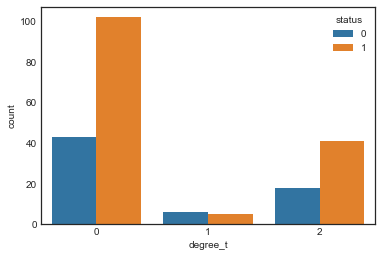

In [76]:
sns.countplot(x='degree_t', hue='status', data=Data)

In [77]:
Data['workex'].value_counts()

0    141
1     74
Name: workex, dtype: int64

In [78]:
df = pd.DataFrame(Data.groupby(['workex','status'])['status'].count())
df

status
workex status        
0      0           57
       1           84
1      0           10
       1           64

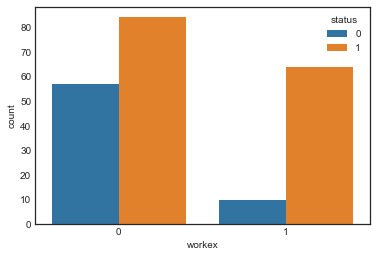

In [79]:
sns.countplot(x='workex', hue='status', data=Data)

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Employment Test %')

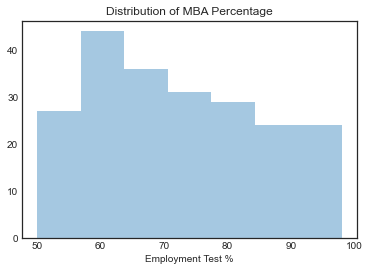

In [80]:
sns.distplot(Data['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')

Text(3.924999999999997, 0.5, 'Employment Test %')

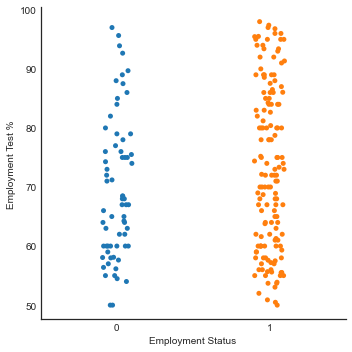

In [81]:
sns.catplot(y='etest_p', x='status', data=Data)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

In [82]:
Data['specialisation'].value_counts()

0    120
1     95
Name: specialisation, dtype: int64

In [83]:
df = pd.DataFrame(Data.groupby(['specialisation','status'])['status'].count())
df

status
specialisation status        
0              0           25
               1           95
1              0           42
               1           53

Text(0.5, 0, 'MBA Specialization')

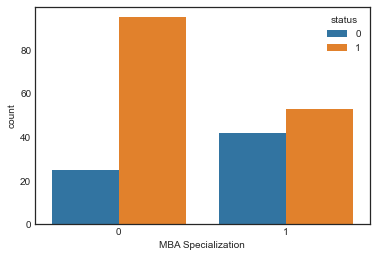

In [84]:
sns.countplot(x='specialisation', hue='status', data=Data)
plt.xlabel('MBA Specialization')

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'MBA %')

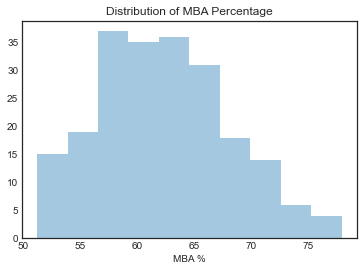

In [85]:
sns.distplot(Data['mba_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA %')

Text(9.549999999999997, 0.5, 'MBA %')

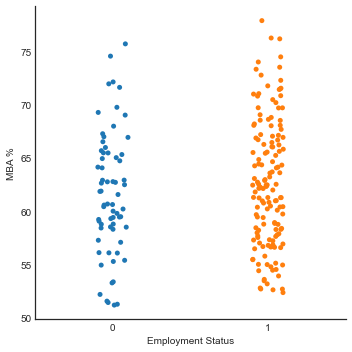

In [86]:
sns.catplot(y='mba_p', x='status', data=Data)
plt.xlabel('Employment Status')
plt.ylabel('MBA %')

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Salary')

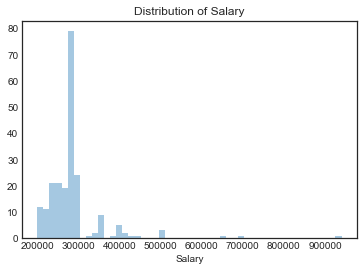

In [87]:
sns.distplot(Data['salary'], kde=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')

Text(-12.950000000000003, 0.5, 'Salary')

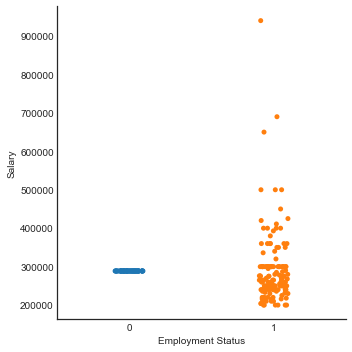

In [88]:
sns.catplot(y='salary', x='status', data=Data)
plt.xlabel('Employment Status')
plt.ylabel('Salary')

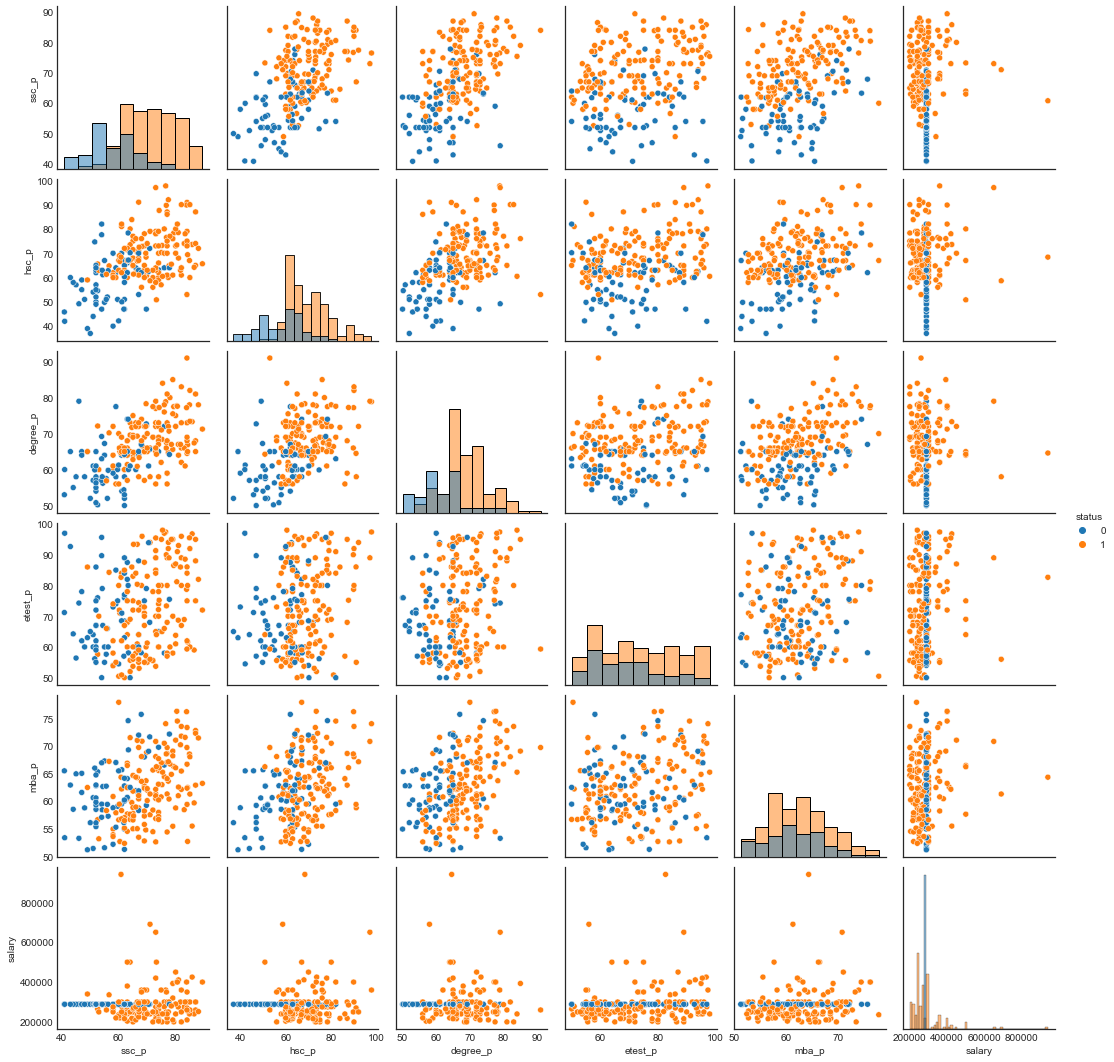

In [89]:
sns.pairplot(data=Data[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary', 'status']], hue="status", diag_kind='hist')

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


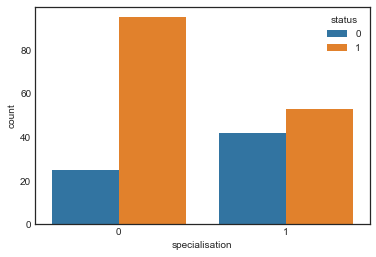

In [92]:
sns.countplot("specialisation", hue="status", data=Data)

Text(0.5, 1.0, 'Salary vs MBA Percentage')

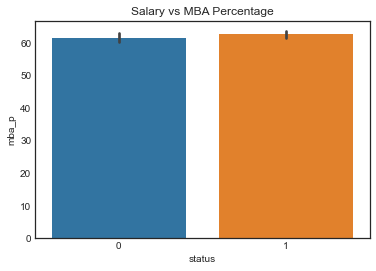

In [95]:
sns.barplot(x="status", y="mba_p", data=Data)
plt.title("Salary vs MBA Percentage")

In [101]:
Data.dtypes

sl_no               int64
gender              int32
ssc_p             float64
hsc_p             float64
degree_p          float64
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
dtype: object

In [102]:
data_clf = Data.copy()
data_reg = Data.copy()

### Data Modelling

#### DECISSION TREE CLASSIFIER

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [105]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [107]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [108]:
accuracy_score(y_test, y_pred)

0.8307692307692308

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73        24
           1       0.81      0.95      0.88        41

    accuracy                           0.83        65
   macro avg       0.85      0.79      0.80        65
weighted avg       0.84      0.83      0.82        65



#### RANDOM FOREST ALGORITHM

In [114]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [115]:
accuracy_score(y_test, y_pred)

0.8615384615384616

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.82      1.00      0.90        41

    accuracy                           0.86        65
   macro avg       0.91      0.81      0.84        65
weighted avg       0.89      0.86      0.85        65



##### Feature Selection untuk Regresi Linear

In [117]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]
#Add Rows
for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dtree.feature_importances_[index//2])]
    imp.iloc[index + 1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


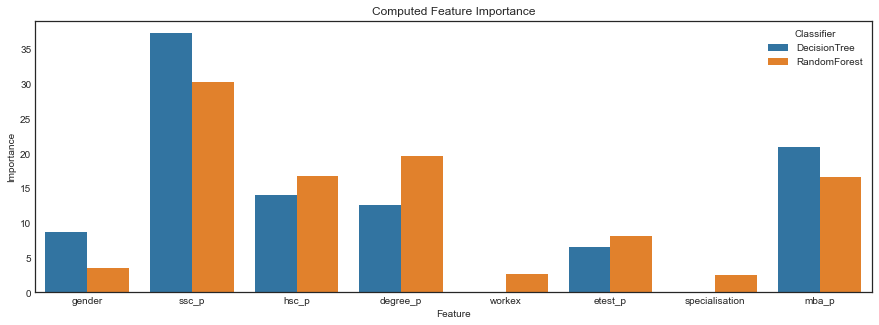

In [118]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

In [125]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

In [134]:
X.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.00,58.80,1,0,1,0,1,0
1,79.33,78.33,77.48,86.50,66.28,1,0,0,1,0,1
2,65.00,68.00,64.00,75.00,57.80,1,0,1,0,0,1
3,56.00,52.00,52.00,66.00,59.43,1,0,1,0,1,0
4,85.80,73.60,73.30,96.80,55.50,1,0,1,0,0,1
5,55.00,49.80,67.25,55.00,51.58,1,0,0,1,0,1
6,46.00,49.20,79.00,74.28,53.29,0,1,1,0,0,1
7,82.00,64.00,66.00,67.00,62.14,1,0,0,1,0,1
8,73.00,79.00,72.00,91.34,61.29,1,0,1,0,0,1
9,58.00,70.00,61.00,54.00,52.21,1,0,1,0,0,1


##### One-Hot Encoding

In [126]:
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

#### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [131]:
accuracy_score(y_test, y_pred)

0.8615384615384616

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.84      1.00      0.91        46

    accuracy                           0.86        65
   macro avg       0.92      0.76      0.80        65
weighted avg       0.88      0.86      0.85        65

